In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import funciones as fs

In [4]:
Mi_pais = fs.cargar_dataset("Berlin_data_sin_nulos.csv")
pd.options.display.max_rows =10

In [5]:
Mi_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  13984 non-null  int64  
 1   Unnamed: 0                                    13984 non-null  int64  
 2   id                                            13984 non-null  int64  
 3   scrape_id                                     13984 non-null  int64  
 4   name                                          13984 non-null  object 
 5   host_id                                       13984 non-null  int64  
 6   latitude                                      13984 non-null  float64
 7   longitude                                     13984 non-null  float64
 8   property_type                                 13984 non-null  object 
 9   room_type                                     13984 non-null 

In [6]:
fs.cuenta_valores_nulos(Mi_pais)
pd.options.display.max_rows = None
fs.cuenta_valores_nulos(Mi_pais)

('Valores nulos por columna',
 Unnamed: 0.1                                    0
 Unnamed: 0                                      0
 id                                              0
 scrape_id                                       0
 name                                            0
 host_id                                         0
 latitude                                        0
 longitude                                       0
 property_type                                   0
 room_type                                       0
 accommodates                                    0
 minimum_nights                                  0
 maximum_nights                                  0
 minimum_minimum_nights                          0
 maximum_minimum_nights                          0
 minimum_maximum_nights                          0
 maximum_maximum_nights                          0
 minimum_nights_avg_ntm                          0
 maximum_nights_avg_ntm                          0
 

In [7]:
columns_to_convert = ["id","scrape_id","host_id"]
Mi_pais[columns_to_convert] = Mi_pais[columns_to_convert].astype(str)


In [8]:
Mi_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  13984 non-null  int64  
 1   Unnamed: 0                                    13984 non-null  int64  
 2   id                                            13984 non-null  object 
 3   scrape_id                                     13984 non-null  object 
 4   name                                          13984 non-null  object 
 5   host_id                                       13984 non-null  object 
 6   latitude                                      13984 non-null  float64
 7   longitude                                     13984 non-null  float64
 8   property_type                                 13984 non-null  object 
 9   room_type                                     13984 non-null 

In [9]:
cuantitativas = Mi_pais.select_dtypes(include=["float64","int64","float","int"])
cuantitativas = cuantitativas.drop(columns=["Unnamed: 0.1","Unnamed: 0"])

cualitativas = Mi_pais.select_dtypes(include=["object","datetime","category"])


In [10]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13984 entries, 0 to 13983
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   latitude                                      13984 non-null  float64
 1   longitude                                     13984 non-null  float64
 2   accommodates                                  13984 non-null  int64  
 3   minimum_nights                                13984 non-null  int64  
 4   maximum_nights                                13984 non-null  int64  
 5   minimum_minimum_nights                        13984 non-null  int64  
 6   maximum_minimum_nights                        13984 non-null  int64  
 7   minimum_maximum_nights                        13984 non-null  int64  
 8   maximum_maximum_nights                        13984 non-null  int64  
 9   minimum_nights_avg_ntm                        13984 non-null 

<Figure size 1500x800 with 0 Axes>

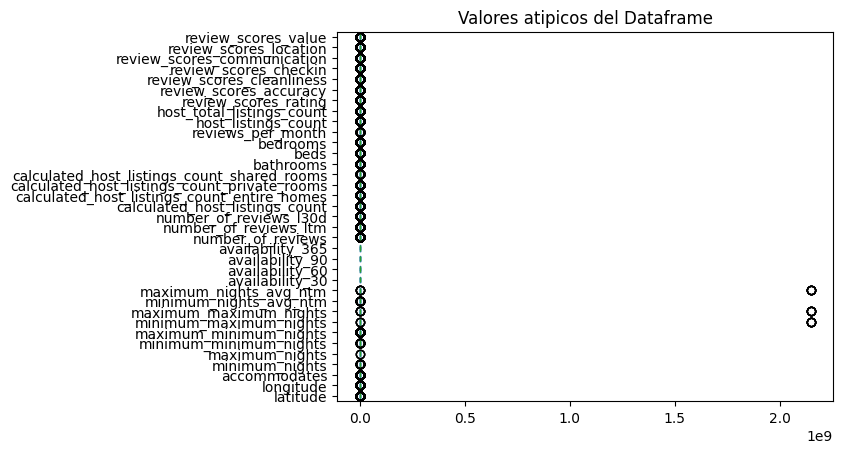

In [11]:
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind="box", vert=False)
plt.title("Valores atipicos del Dataframe")
plt.show()

In [12]:
#procedimiento cunatiles para sustituir outliers en dataframe
y=cuantitativas
percentile25=y.quantile(0.25)#Q1
percintile75=y.quantile(0.75) #Q3
iqr = percintile75-percentile25

limite_superior_iqr = percintile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Limite superior permitido", limite_superior_iqr)
print("Limite inferior permitido", limite_inferior_iqr)

Limite superior permitido latitude                                          52.595256
longitude                                         13.552550
accommodates                                       7.000000
minimum_nights                                   227.000000
maximum_nights                                  2670.000000
minimum_minimum_nights                           227.000000
maximum_minimum_nights                           225.500000
minimum_maximum_nights                          2542.500000
maximum_maximum_nights                          2512.500000
minimum_nights_avg_ntm                           227.000000
maximum_nights_avg_ntm                          2541.150000
availability_30                                   55.000000
availability_60                                  122.500000
availability_90                                  195.000000
availability_365                                 672.500000
number_of_reviews                                 86.000000
number_of_revi

In [13]:
data3_iqr = cuantitativas[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
pd.options.display.max_rows = 10
data3_iqr

,latitude,longitude,accommodates,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,...,reviews_per_month,host_listings_count,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,52.488550,13.414800,2.0,92.0,1125.0,92.0,92.0,1125.0,1125.0,92.0,...,0.09,1.0,1.0,5.00,4.91,5.00,4.91,5.00,4.64,4.82
1,52.560900,13.350000,2.0,93.0,365.0,93.0,93.0,365.0,365.0,93.0,...,3.00,7.0,7.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
2,52.504812,13.415324,2.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,...,NaN,1.0,1.0,4.97,4.97,5.00,4.97,4.97,4.94,4.94
3,52.548240,13.357780,2.0,92.0,1125.0,92.0,92.0,1125.0,1125.0,92.0,...,0.01,1.0,3.0,5.00,5.00,NaN,5.00,5.00,NaN,NaN
4,52.536470,13.420490,3.0,92.0,1125.0,92.0,92.0,1125.0,1125.0,92.0,...,3.00,1.0,1.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979,52.524718,13.460553,1.0,1.0,365.0,1.0,30.0,365.0,365.0,6.1,...,0.82,3.0,3.0,5.00,5.00,4.89,5.00,5.00,4.78,5.00
13980,52.487360,13.375470,2.0,92.0,330.0,92.0,92.0,330.0,330.0,92.0,...,3.00,NaN,NaN,4.80,4.80,4.70,4.80,4.80,4.80,4.70
13981,52.464017,13.444353,2.0,1.0,365.0,1.0,2.0,365.0,365.0,1.3,...,3.00,6.0,6.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
13982,52.544950,13.440550,2.0,92.0,365.0,92.0,92.0,365.0,365.0,92.0,...,3.00,2.0,2.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70


In [14]:
valores_atipicos=data3_iqr.isnull().sum()
valores_atipicos

latitude                        401
longitude                       565
accommodates                    456
minimum_nights                   42
maximum_nights                    3
                               ... 
review_scores_cleanliness      1082
review_scores_checkin           675
review_scores_communication     720
review_scores_location         1067
review_scores_value            1104
Length: 35, dtype: int64

In [15]:
data_4_iqr = data3_iqr.copy()
data_4_iqr = data_4_iqr.fillna(round(data3_iqr.mean(),1))
pd.options.display.max_rows = 10
data_4_iqr


,latitude,longitude,accommodates,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,...,reviews_per_month,host_listings_count,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,52.488550,13.414800,2.0,92.0,1125.0,92.0,92.0,1125.0,1125.0,92.0,...,0.09,1.0,1.0,5.00,4.91,5.00,4.91,5.00,4.64,4.82
1,52.560900,13.350000,2.0,93.0,365.0,93.0,93.0,365.0,365.0,93.0,...,3.00,7.0,7.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
2,52.504812,13.415324,2.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,...,1.60,1.0,1.0,4.97,4.97,5.00,4.97,4.97,4.94,4.94
3,52.548240,13.357780,2.0,92.0,1125.0,92.0,92.0,1125.0,1125.0,92.0,...,0.01,1.0,3.0,5.00,5.00,4.80,5.00,5.00,4.80,4.70
4,52.536470,13.420490,3.0,92.0,1125.0,92.0,92.0,1125.0,1125.0,92.0,...,3.00,1.0,1.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979,52.524718,13.460553,1.0,1.0,365.0,1.0,30.0,365.0,365.0,6.1,...,0.82,3.0,3.0,5.00,5.00,4.89,5.00,5.00,4.78,5.00
13980,52.487360,13.375470,2.0,92.0,330.0,92.0,92.0,330.0,330.0,92.0,...,3.00,1.9,2.8,4.80,4.80,4.70,4.80,4.80,4.80,4.70
13981,52.464017,13.444353,2.0,1.0,365.0,1.0,2.0,365.0,365.0,1.3,...,3.00,6.0,6.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
13982,52.544950,13.440550,2.0,92.0,365.0,92.0,92.0,365.0,365.0,92.0,...,3.00,2.0,2.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70


In [16]:

Datos_limpios = pd.concat([cualitativas, data_4_iqr], axis=1)
Datos_limpios


,id,scrape_id,name,host_id,property_type,room_type,instant_bookable,host_name,description,license,...,reviews_per_month,host_listings_count,host_total_listings_count,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2084992,20241221052002,"Nice and cozy apartment in Kreuzberg, Graefekiez",6302373,Entire rental unit,Entire home/apt,f,Andreas,Our cosy two room Apartment (70qm) in a vibrat...,01/Z/AZ/017416-24,...,0.09,1.0,1.0,5.00,4.91,5.00,4.91,5.00,4.64,4.82
1,1123383729460847373,20241221052002,Furnished room in well equipped serviced apart...,206488801,Private room in rental unit,Private room,f,Supriya,Room in an apartment available. Apartment has ...,01/Z/AZ/017416-24,...,3.00,7.0,7.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
2,1205255838613758737,20241221052002,Luxurous game room with private bath in X-Berg,50009901,Private room in condo,Private room,f,Gabriel,Cozy private room in Berlin Mitte with private...,01/Z/AZ/017416-24,...,1.60,1.0,1.0,4.97,4.97,5.00,4.97,4.97,4.94,4.94
3,8164759,20241221052002,Beautiful single-room studio,42115726,Entire rental unit,Entire home/apt,f,Lars,Experience the “real Berlin” in our small and ...,01/Z/NA/004162-16,...,0.01,1.0,3.0,5.00,5.00,4.80,5.00,5.00,4.80,4.70
4,18836877,20241221052002,Unterkunft zentral in Berlin,131184702,Entire rental unit,Entire home/apt,f,Jana,"The accommodation has 3 rooms, however, is onl...",01/Z/NA/004162-16,...,3.00,1.0,1.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979,1066742710842868324,20241221052002,Cozy bedroom in a stylish house,125006999,Private room in home,Private room,f,Sophie,Located in the heart of Berlin! 10 minutes wal...,03/Z/AZ/007577-22,...,0.82,3.0,3.0,5.00,5.00,4.89,5.00,5.00,4.78,5.00
13980,882524735229064604,20241221052002,hornos - 1 bedroom apartment in kreuzberg,449692327,Entire rental unit,Entire home/apt,t,Ukio Germany,"Spectacular apartment in Eylauerstrasse, with ...",Legal entity name and Legal form: Bellman Hote...,...,3.00,1.9,2.8,4.80,4.80,4.70,4.80,4.80,4.80,4.70
13981,1172288594718636022,20241221052002,Deluxe Superior Accessible,570785536,Room in hotel,Private room,t,Sergio,This wheelchair accessible double room feature...,Legal entity name and Legal form: Bellman Hote...,...,3.00,6.0,6.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70
13982,1233927040956879330,20241221052002,Prenzlauerberg Berlin,3893392,Entire rental unit,Entire home/apt,f,Nikolaj,Fully equipped apartment with large balcony in...,First name and Last name: Ines Chebli <br/> Co...,...,3.00,2.0,2.0,4.80,4.80,4.70,4.80,4.80,4.80,4.70


In [17]:
Datos_limpios.to_csv("Datos_limpios_Berlin.csv")

In [18]:
Mexico = fs.cargar_dataset("CDMX.csv")
Mexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20241227033128,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20241227033128,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,8,4,1,0,0.40
2,67703,https://www.airbnb.com/rooms/67703,20241227033128,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.31
3,70644,https://www.airbnb.com/rooms/70644,20241227033128,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.84
4,131610,https://www.airbnb.com/rooms/131610,20241227033128,2024-12-28,previous scrape,MARIA DEL ALMA,NaN,NaN,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,https://www.airbnb.com/rooms/1318906185008171760,20241227033128,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,369403303,...,NaN,NaN,NaN,NaN,t,12,0,12,0,NaN
26277,1318960023050066631,https://www.airbnb.com/rooms/1318960023050066631,20241227033128,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,525554527,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26278,1318997244771691320,https://www.airbnb.com/rooms/1318997244771691320,20241227033128,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,293574406,...,NaN,NaN,NaN,NaN,t,8,0,5,3,NaN
26279,1319078571963617776,https://www.airbnb.com/rooms/1319078571963617776,20241227033128,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,35255741,...,NaN,NaN,NaN,NaN,t,31,31,0,0,NaN


In [19]:
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  int64  
 1   listing_url                                   26281 non-null  object 
 2   scrape_id                                     26281 non-null  int64  
 3   last_scraped                                  26281 non-null  object 
 4   source                                        26281 non-null  object 
 5   name                                          26281 non-null  object 
 6   description                                   25513 non-null  object 
 7   neighborhood_overview                         15110 non-null  object 
 8   picture_url                                   26281 non-null  object 
 9   host_id                                       26281 non-null 

In [20]:

pd.options.display.max_rows = None
fs.cuenta_valores_nulos(Mexico)

('Valores nulos por columna',
 id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
 name                                                0
 description                                       768
 neighborhood_overview                           11171
 picture_url                                         0
 host_id                                             0
 host_url                                            0
 host_name                                           3
 host_since                                          3
 host_location                                    5393
 host_about                                      10603
 host_response_time                               3172
 host_response_rate                               3172
 host_acceptance_rate              

In [21]:
data1 = Mexico.fillna(method="bfill")
pd.options.display.max_rows = 10
data1

/var/folders/55/wyghdbg574v82z73n_3mj8cw0000gn/T/ipykernel_14144/2748011463.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 = Mexico.fillna(method="bfill")


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20241227033128,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.78,4.98,4.48,NaN,f,1,1,0,0,0.40
1,44616,https://www.airbnb.com/rooms/44616,20241227033128,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,8,4,1,0,0.40
2,67703,https://www.airbnb.com/rooms/67703,20241227033128,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.31
3,70644,https://www.airbnb.com/rooms/70644,20241227033128,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.84
4,131610,https://www.airbnb.com/rooms/131610,20241227033128,2024-12-28,previous scrape,MARIA DEL ALMA,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,4.90,4.75,4.91,NaN,f,3,1,2,0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,https://www.airbnb.com/rooms/1318906185008171760,20241227033128,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,369403303,...,NaN,NaN,NaN,NaN,t,12,0,12,0,NaN
26277,1318960023050066631,https://www.airbnb.com/rooms/1318960023050066631,20241227033128,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/prohost-api/H...,525554527,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26278,1318997244771691320,https://www.airbnb.com/rooms/1318997244771691320,20241227033128,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,293574406,...,NaN,NaN,NaN,NaN,t,8,0,5,3,NaN
26279,1319078571963617776,https://www.airbnb.com/rooms/1319078571963617776,20241227033128,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,35255741,...,NaN,NaN,NaN,NaN,t,31,31,0,0,NaN


In [22]:
data2 = data1.fillna(method="ffill")
pd.options.display.max_rows = 10
data2


/var/folders/55/wyghdbg574v82z73n_3mj8cw0000gn/T/ipykernel_14144/3361076022.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data2 = data1.fillna(method="ffill")


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20241227033128,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.78,4.98,4.48,NaN,f,1,1,0,0,0.40
1,44616,https://www.airbnb.com/rooms/44616,20241227033128,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,8,4,1,0,0.40
2,67703,https://www.airbnb.com/rooms/67703,20241227033128,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.31
3,70644,https://www.airbnb.com/rooms/70644,20241227033128,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.84
4,131610,https://www.airbnb.com/rooms/131610,20241227033128,2024-12-28,previous scrape,MARIA DEL ALMA,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,4.90,4.75,4.91,NaN,f,3,1,2,0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,https://www.airbnb.com/rooms/1318906185008171760,20241227033128,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,369403303,...,5.00,5.00,5.00,NaN,t,12,0,12,0,1.00
26277,1318960023050066631,https://www.airbnb.com/rooms/1318960023050066631,20241227033128,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/prohost-api/H...,525554527,...,5.00,5.00,5.00,NaN,t,1,1,0,0,1.00
26278,1318997244771691320,https://www.airbnb.com/rooms/1318997244771691320,20241227033128,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,293574406,...,5.00,5.00,5.00,NaN,t,8,0,5,3,1.00
26279,1319078571963617776,https://www.airbnb.com/rooms/1319078571963617776,20241227033128,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,35255741,...,5.00,5.00,5.00,NaN,t,31,31,0,0,1.00


In [23]:

pd.options.display.max_rows = None
fs.cuenta_valores_nulos(data2)

('Valores nulos por columna',
 id                                                  0
 listing_url                                         0
 scrape_id                                           0
 last_scraped                                        0
 source                                              0
 name                                                0
 description                                         0
 neighborhood_overview                               0
 picture_url                                         0
 host_id                                             0
 host_url                                            0
 host_name                                           0
 host_since                                          0
 host_location                                       0
 host_about                                          0
 host_response_time                                  0
 host_response_rate                                  0
 host_acceptance_rate              

In [24]:
cdmx = data2.drop(columns=["neighbourhood_group_cleansed","calendar_updated","license"])
pd.options.display.max_rows = 10
cdmx


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20241227033128,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.87,4.78,4.98,4.48,f,1,1,0,0,0.40
1,44616,https://www.airbnb.com/rooms/44616,20241227033128,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.87,4.78,4.98,4.48,f,8,4,1,0,0.40
2,67703,https://www.airbnb.com/rooms/67703,20241227033128,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.94,4.92,4.98,4.92,f,2,2,0,0,0.31
3,70644,https://www.airbnb.com/rooms/70644,20241227033128,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.96,4.98,4.96,4.92,f,3,2,1,0,0.84
4,131610,https://www.airbnb.com/rooms/131610,20241227033128,2024-12-28,previous scrape,MARIA DEL ALMA,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,4.92,4.90,4.75,4.91,f,3,1,2,0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,https://www.airbnb.com/rooms/1318906185008171760,20241227033128,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,369403303,...,5.00,5.00,5.00,5.00,t,12,0,12,0,1.00
26277,1318960023050066631,https://www.airbnb.com/rooms/1318960023050066631,20241227033128,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/prohost-api/H...,525554527,...,5.00,5.00,5.00,5.00,t,1,1,0,0,1.00
26278,1318997244771691320,https://www.airbnb.com/rooms/1318997244771691320,20241227033128,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,293574406,...,5.00,5.00,5.00,5.00,t,8,0,5,3,1.00
26279,1319078571963617776,https://www.airbnb.com/rooms/1319078571963617776,20241227033128,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,35255741,...,5.00,5.00,5.00,5.00,t,31,31,0,0,1.00


In [25]:
columns_to_convert2 = ["id","scrape_id","host_id"]
cdmx[columns_to_convert2] = cdmx[columns_to_convert2].astype(str)

In [26]:
cdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26281 non-null  object 
 1   listing_url                                   26281 non-null  object 
 2   scrape_id                                     26281 non-null  object 
 3   last_scraped                                  26281 non-null  object 
 4   source                                        26281 non-null  object 
 5   name                                          26281 non-null  object 
 6   description                                   26281 non-null  object 
 7   neighborhood_overview                         26281 non-null  object 
 8   picture_url                                   26281 non-null  object 
 9   host_id                                       26281 non-null 

In [27]:
cuantitativas2 = cdmx.select_dtypes(include=["float64","int64","float","int"])
cualitativas2 = cdmx.select_dtypes(include=["object","datetime","category"])

<Figure size 1500x800 with 0 Axes>

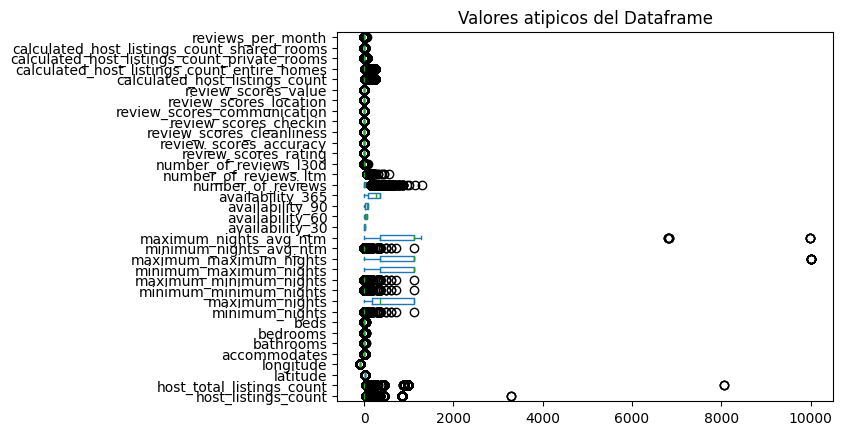

In [28]:
fig = plt.figure(figsize=(15,8))
cuantitativas2.plot(kind="box", vert=False)
plt.title("Valores atipicos del Dataframe")
plt.show()

In [29]:
#procedimiento cunatiles para sustituir outliers en dataframe
y=cuantitativas2
percentile25=y.quantile(0.25)#Q1
percintile75=y.quantile(0.75) #Q3
iqr = percintile75-percentile25

limite_superior_iqr = percintile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr

print("Limite superior permitido", limite_superior_iqr)
print("Limite inferior permitido", limite_inferior_iqr)

Limite superior permitido host_listings_count                             33.500000
host_total_listings_count                       39.500000
latitude                                        19.492980
longitude                                      -99.118304
accommodates                                     7.000000
                                                  ...    
calculated_host_listings_count                  26.000000
calculated_host_listings_count_entire_homes     15.000000
calculated_host_listings_count_private_rooms     5.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                                5.645000
Length: 35, dtype: float64
Limite inferior permitido host_listings_count                            -18.500000
host_total_listings_count                      -20.500000
latitude                                        19.330100
longitude                                      -99.215386
accommodates                                    -1.

In [30]:
#obtenemos dtaos limpos del dataframe 
data5_iqr = cuantitativas2[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]
data5_iqr

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,19.382830,NaN,2.0,1.0,1.0,1.0,1.0,7,...,4.70,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0,0.40
1,12.0,13.0,19.411620,-99.177940,NaN,NaN,NaN,NaN,1.0,365,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3.0,4.0,19.354480,-99.162170,2.0,1.0,1.0,1.0,3.0,180,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,3.0,4.0,19.354160,-99.164880,2.0,NaN,2.0,NaN,1.0,730,...,4.84,4.92,4.90,4.75,4.91,3.0,1.0,2.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,13.0,16.0,19.436998,-99.196733,2.0,1.0,1.0,1.0,1.0,365,...,5.00,5.00,5.00,5.00,5.00,12.0,0.0,NaN,0.0,1.00
26277,NaN,NaN,19.449230,-99.136170,3.0,1.0,2.0,2.0,1.0,365,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
26278,8.0,8.0,NaN,NaN,6.0,2.0,1.0,NaN,3.0,365,...,5.00,5.00,5.00,5.00,5.00,8.0,0.0,5.0,NaN,1.00
26279,NaN,NaN,19.400096,-99.172981,NaN,3.0,3.0,NaN,1.0,730,...,5.00,5.00,5.00,5.00,5.00,NaN,NaN,0.0,0.0,1.00


In [31]:
valores_atipicos=data5_iqr.isnull().sum()
valores_atipicos

host_listings_count                             3521
host_total_listings_count                       3696
latitude                                        1812
longitude                                       2843
accommodates                                    1320
                                                ... 
calculated_host_listings_count                  3380
calculated_host_listings_count_entire_homes     3917
calculated_host_listings_count_private_rooms    3169
calculated_host_listings_count_shared_rooms      382
reviews_per_month                               1004
Length: 35, dtype: int64

In [32]:
data_6_iqr = data5_iqr.copy()
data_6_iqr = data_6_iqr.fillna(round(data5_iqr.mean(),1))
data_6_iqr

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,1.0,19.382830,-99.200000,2.0,1.0,1.0,1.0,1.0,7,...,4.70,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0,0.40
1,12.0,13.0,19.411620,-99.177940,3.0,1.4,1.4,1.6,1.0,365,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.0,2.0,30,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,3.0,4.0,19.354480,-99.162170,2.0,1.0,1.0,1.0,3.0,180,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,3.0,4.0,19.354160,-99.164880,2.0,1.4,2.0,1.6,1.0,730,...,4.84,4.92,4.90,4.75,4.91,3.0,1.0,2.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,13.0,16.0,19.436998,-99.196733,2.0,1.0,1.0,1.0,1.0,365,...,5.00,5.00,5.00,5.00,5.00,12.0,0.0,0.7,0.0,1.00
26277,6.2,7.4,19.449230,-99.136170,3.0,1.0,2.0,2.0,1.0,365,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
26278,8.0,8.0,19.400000,-99.200000,6.0,2.0,1.0,1.6,3.0,365,...,5.00,5.00,5.00,5.00,5.00,8.0,0.0,5.0,0.0,1.00
26279,6.2,7.4,19.400096,-99.172981,3.0,3.0,3.0,1.6,1.0,730,...,5.00,5.00,5.00,5.00,5.00,5.0,2.4,0.0,0.0,1.00


In [33]:
Datos_limpios = pd.concat([cualitativas2, data_6_iqr], axis=1)
Datos_limpios

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20241227033128,2024-12-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,4.70,4.87,4.78,4.98,4.48,1.0,1.0,0.0,0.0,0.40
1,44616,https://www.airbnb.com/rooms/44616,20241227033128,2024-12-28,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.40
2,67703,https://www.airbnb.com/rooms/67703,20241227033128,2024-12-28,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.76,4.94,4.92,4.98,4.92,2.0,2.0,0.0,0.0,0.31
3,70644,https://www.airbnb.com/rooms/70644,20241227033128,2024-12-27,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.84
4,131610,https://www.airbnb.com/rooms/131610,20241227033128,2024-12-28,previous scrape,MARIA DEL ALMA,Welcome to Your Home in Mexico City<br />We ha...,San Miguel Chapultepec is the best kept secret...,https://a0.muscache.com/pictures/837085/b9ed71...,647454,...,4.84,4.92,4.90,4.75,4.91,3.0,1.0,2.0,0.0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,https://www.airbnb.com/rooms/1318906185008171760,20241227033128,2024-12-28,city scrape,Suite Dumas Polanco 8D,"You will love this adorable place to stay, kin...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,369403303,...,5.00,5.00,5.00,5.00,5.00,12.0,0.0,0.7,0.0,1.00
26277,1318960023050066631,https://www.airbnb.com/rooms/1318960023050066631,20241227033128,2024-12-27,city scrape,Departamento amueblado en CDMX,Enjoy a cozy condominium in the heart of Mexic...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/prohost-api/H...,525554527,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,1.00
26278,1318997244771691320,https://www.airbnb.com/rooms/1318997244771691320,20241227033128,2024-12-27,city scrape,hospedaje en Coyoacán CDMX,Relax with the whole family in this accommodat...,"La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/hosting/Hosti...,293574406,...,5.00,5.00,5.00,5.00,5.00,8.0,0.0,5.0,0.0,1.00
26279,1319078571963617776,https://www.airbnb.com/rooms/1319078571963617776,20241227033128,2024-12-28,city scrape,3 recámaras 3 baños con estacionamiento,"It has: High Speed Internet, Equipped Kitchen,...","La Escandón II is a lively neighborhood, known...",https://a0.muscache.com/pictures/miso/Hosting-...,35255741,...,5.00,5.00,5.00,5.00,5.00,5.0,2.4,0.0,0.0,1.00


In [34]:
Datos_limpios.to_csv("Datos_limpios_MEXICO.csv")